<H1>Chapter 2: Linked Lists </H1>

2.1 Remove Dups: Write code to remove duplicates from a unsorted linked list.

FOLLOW UP

How would you solve this problem if a temporary buffer is not allowed?

In [1]:
#1. Understand the problem
#2. Sketch out the solution with pen and paper (notes)
#3. Write test cases in order of complexity
#4. Iterate to think of a solution

In [ ]:
#1. The problem. We have to clean up duplicates from a linked list. i.e:
# 10 --> 5 --> 10 --> 3
#should become
# 10--> 5 --> 3

In [ ]:
#2. Sketched solution:

#verify the linked list is not empty
#keep track of data at first node
#traverse list, checking for duplicates
#if duplicate is found, remove 
#after removal, adjust links
#once the end of the list is reached, change the data we are keeping track of, to the following node
#repeat the process until we have reached the end of the list



In [1]:
#3. Write test cases

#1. empty linked list (head==None)
#2. No duplicates [1,7,5]
#3. a duplicate [1,7,1]
#4. two different duplicates [1,7,1,7]

test_cases = [[None],[1,7,5],[1,7,1],[1,7,1,7]]
expected_results = [["linked list is empty!"],[1,7,5],[1,7],[1,7]]

In [44]:
#4. Iterate to think of a soliution

#thinking about my proposed solution, I know we will have to traverse the list, I know it will take O(n^2) time complexity
#because we are iterating through (nearly) each item in the list, for each item in the list (n x n = n^2)
#is there a better way? Not one I can think of (for now)


#continue with this proposed solution



In [45]:
#in order to implement my solution I will define a node class, and a linked list class
#the linked list class will have a method to add new items(to the end of the list)
#I will also create a remove method, that removes a given node
    #in order to avoid deleting the first instance of a data point, we will set a buffer

In [32]:
class Node():
    
    def __init__(self,data):
        self.data = data
        self.ref = None
    
class LinkedList():
    
    def __init__(self):
        self.head = None
    
    #use for testing
    def print_ll(self):
        if self.head is None:
            print("Linked list is empty!")
        else:
            n = self.head
            while n is not None:
                print(n.data,end="-->")
                n = n.ref
    
    #use to add nodes to the end of the list
    def add_end(self,data):
        
        #create the new node
        new_node = Node(data)
        
        if self.head is None:
            self.head = new_node
        #traverse the list, find the last node
        #add the new node, second last node has its reference changed to new node
        else:
            n = self.head
            while n is not None: #1 --> ,   1 --> 7,     1 --> 7 --> 1
                if n.ref is None:
                    n.ref = new_node
                    break
                else:
                    n = n.ref
    
    #use to remove given node
    def remove_node(self,x):
        
        #list is empty
        if self.head is None:
            print("Linked list is empty. No nodes to be removed")
        
        
        #item to be removed is the head
        if x == self.head:
            #set new head
            self.head = self.head.ref
        
        #item to be removed is not head
        #traverse linked list looking for x in next node. if found, set ref to the next ref
        else:
            n = self.head
            while n.ref is not None: #looking for x in next node, not current
                if x == n.ref.data:
                    break
                n = n.ref
              
            #looped through whole linked list and x was not found
            if n.ref is None:
                print("Node is not present!")
        
            #x was found
            else: 
                n.ref = n.ref.ref #change reference to the reference of reference (2 nodes ahead instead of 1)
    
    #Method to remove duplicate items in linked list
    def remove_dups(self):
        
        #verify list is not empty
        if self.head is None:
            print("The linked list is empty, cannot remove duplicates!")
            return
        
        #otherwise
        #iterate through nodes in linked list (image 1-->7-->1)
        x = self.head   #1
        duplicates_removed = 0 
        
        while x is not None:
            #look for duplicates of x
            
            #iterate through the list, starting from x
            
            n = x # start at item after first instance of x       #self.head = 1         
            while n.ref is not None: # look in next item          #7              #1
                if x.data == n.ref.data: # check for duplicate         #1 !=7          #1==1
                    n.ref = n.ref.ref #remove item by severing link               #changes 7's link from 1 to None
                    duplicates_removed += 1
                    #check if were at the end of the list
                    if n.ref is None:
                        break
                    
                    else:
                        n = n.ref #iterate n                                          #7 = none
                else: #just iterate n
                    n = n.ref                                    #n=7                                
            
            #if
            
            #broken out of look (because we reached the end, a.k.a finished our check of duplicates for x)
            x = x.ref # iterate x
        
        print(duplicates_removed," duplicate(s) were removed!")
          
            
        
       #need to account for case where duplicate removed is the last item 
            
            
    

In [30]:
#initialize my linked list, and use the test case [1,7,1], index 2

my_ll = LinkedList()
my_ll.print_ll()

for node in test_cases[2]:
    my_ll.add_end(node)
    
my_ll.print_ll()

Linked list is empty!
1-->7-->1-->

In [33]:
my_ll.remove_dups()
my_ll.print_ll()

0  duplicates were removed!
1-->7-->

In [47]:
#test for all test cases
test_cases = [[None],[1,7,5],[1,7,1],[1,7,1,7]]
expected_results = [["linked list is empty!"],[1,7,5],[1,7],[1,7]]

for case in test_cases:
    
    my_ll = LinkedList()
    
    for node in case:
        my_ll.add_end(node)
        
    my_ll.print_ll()
    print()
    my_ll.remove_dups()
    my_ll.print_ll()
    print()
    print()
    del my_ll

None-->
0  duplicate(s) were removed!
None-->

1-->7-->5-->
0  duplicate(s) were removed!
1-->7-->5-->

1-->7-->1-->
1  duplicate(s) were removed!
1-->7-->

1-->7-->1-->7-->
2  duplicate(s) were removed!
1-->7-->



In [48]:
#Future practice: redo the problem 
#using a hashtable to track duplicates, allows us to go through in O(N) runtime complexity

2.2 Return Kth to last item: Implement an algorithm to find the Kth to last element of a singly linked list.

In [49]:
#1. Understand the problem
#2. Sketch out the solution with pen and paper (notes)
#3. Write test cases in order of complexity
#4. Iterate to think of a solution

In [50]:
#1. Understanding the problem:

#given a linked list, we want to be able to return all items from the kth, to the last node, where k is a given input

In [ ]:
#2. Sketched soultions

# Solution A:

#make sure list is not empty
#traverse the list, looking for k
#if found, add k to a list, finish traversing the list adding nodes after k to list
#once we reach the end of the linked list, return the list of nodes we noted

#Thinking about the solution:

#it will require at least O(n) runtime, since we will have to traverse the linked list
#saving the nodes in a list will also take up some space 
#is there any way to make this solution more efficient?

#can't think of another solution for the moment, proceeding with A

#reflecting now, I'm realizing they want the kth position, and we will have track of how many elements we have traversed
#in order to know if we have k elements or not. this will be a counter

In [51]:
#3. test cases

# empty linked list, should return that its empty
# linked list is not empty, but doesn't have k 
# linked list has k, but k is the last item
# linked list has k, and other nodes that follow


#assuming k = 3
test_cases = [[None],[1,2,4],[1,2,3],[1,2,3,4]]
expected_solutions = [["The linked list is empty!"],["Kth element not in list"],[3],[3,4]]

In [79]:
#4. Iterate to think of a solution

#first practice implementing the linked list
    #create a method to add elements to the end of the list
    #create a method to print the list
    #create the method to return the Kth to last element
    

class Node():
    
    def __init__(self,data):
        self.data = data
        self.next = None
        
class LinkedList():
    
    def __init__(self):
        self.head = None
        
    #method to print the linked list
    def print_ll(self):
        
        if self.head is None:
            print("The linked list is empty!")
        else:
            current = self.head
            while current is not None:
                print(current.data,end="-->")
                current = current.next
    
    #method to add elements to the end of linked list
    def add_end(self,data):
        
        #create new node
        new_node = Node(data)
        
        #list is empty, element becomes the head
        if self.head is None:
            self.head = new_node
        else:
            current = self.head
            while current.next is not None: #current.next because we want to stop at the last item, and change it
                current = current.next
            
            #once out of the loop, we are at the end, because current is None, so we add the new node
            current.next = new_node
    
    #method to return kth to last element
    def k_to_last(self,k):
        
        #verify list is not empty
        if self.head is None:
            print("The linked list is empty!")
        else:
            min_elements = 1 #keep track of number of minimum number of elements for k to be in linked list, assuming 1 start
            k_to_last = [] #keep track of elements from k onwards
            current = self.head
            while current.next is not None:     #1-->2-->3-->   k=4      #1           #2   #3
                
                #check if linked list holds at least k elements
                if k == min_elements:                               #1 != 4  #2 != 4  #3 != 4
                    k_to_last.append(current.data)
                    current = current.next
                else:
                    min_elements += 1                               #2           #3     #4     
                    current = current.next                          #2           #3
            
            #add last element to the 
            k_to_last.append(current.data)
            
            #were out of the loop because current is none
            
            #there were less than k elements in the list
            if min_elements != k:
                print("Kth element not in list")
                
            #otherwise return list of kth to last elements
            else:
                print(k_to_last)
                return k_to_last
                
                
                    
                
            
        
    
    

In [58]:
#test the above

my_ll = LinkedList()
my_ll.add_end(1)
my_ll.add_end(3)
my_ll.add_end(5)
my_ll.print_ll()

1-->3-->5-->

In [64]:
#assuming k = 3
test_cases = [[None],[1,2,4],[1,2,3],[1,2,3,4]]
expected_solutions = [["The linked list is empty!"],["Kth element not in list"],[3],[3,4]]

In [81]:
for case in test_cases:
    
    my_ll = LinkedList()
    
    for element in case:
        my_ll.add_end(element)

    print("starting linked list")
    my_ll.print_ll()
    print()
    k = 3 #got buggy at 4
    print("with k as {}".format(k))
    my_ll.k_to_last(k)
    print()
    print()

    del my_ll

#assuming that the first element in the linked list, is 1 and not 0        

starting linked list
None-->
with k as 3
Kth element not in list


starting linked list
1-->2-->4-->
with k as 3
[4]


starting linked list
1-->2-->3-->
with k as 3
[3]


starting linked list
1-->2-->3-->4-->
with k as 3
[3, 4]




In [82]:
#misunderstood question. 
#future practice: Retry where the objective is to return one element, that is k away from last
#i.e. k = 1 means the last item in the linked list, and k = 2 means the second last item in the linked list

2.3 Delete Middle Node: Implement an algorithm to delete a node in the middle (i.e., any node but the first and last node, not necessarily the exact middle) of a singly linked list, given only access to that node. 

EXAMPLE

Input: the node c from the linked list a --> b --> c --> d --> e --> f

Result: nothing is returned, but the new linked list looks like a --> b --> d --> e --> f

In [83]:
#1. Understand the problem
#2. Sketch out the solution with pen and paper (notes)
#3. Write test cases in order of complexity
#4. Iterate to think of a solution

In [1]:
#1. Understanding the problem

#not sure I understand by 'given only access to that node'
#can't access the nodes on either side?

#hint #2 says: 

#Picture the list 1 -> 5 -> 9 -> 12. Removing 9 would make it look like 1 -> 5 -> 12. You only have access to 9.
#Can you make it look like the write answer?

#if we knew all that, we could replace the data as 1 -> 5 -> 12, so that when we accessed 9, 
#it would LOOK like the right answer

#to actually solve the problem, we are trying to remove 9, aka, update the reference at 5 to be 12

#after peeping the solution in the book...

#since we have access to 9, we have access to next, since it is a singly linked list.
#we want to copy all the information from the node after 9, (12), into the node 9, then delete node 12



In [2]:
#2. Sketch solution with pen and paper

#traverse list until we find middle node
#can't be at first node, and can't be at last
#for all the other nodes in between we will see if current == x
#once found, set current.data = current.next.data and current.ref = current.next.ref to copy data over
#then delete the next node (severe the link) by setting current.next.ref = None

#thinking about my proposed solution...
#worst run-time scenario is O(N), if we get to the end and don't see x

#if we could really just access x, and actually start there, the run time would be O(1)
#what would this look like? 
#a linked list where the 'head' actually contains a certain number of nodes before hand
    #or rather a seperate pointer that points to this specific node

In [4]:
#3. Write test cases in order of complexity

#1. list is empty
#2. List is not empty but node x is at the head
#3. List is not empty but node x is at the end
#4. Provided example, remove c from a --> b --> c --> d --> e --> f
#5. Provided example in hint, remove 9 from 1 -> 5 -> 9 -> 12

In [6]:
#4. Iterate to think of a solution

#Implement a linked list
    #method to print
    #method to add nodes to end
    #method to delete from middle (between first and last)
        #verify list is not empty
        #verify list has at least 3 items, self.head.next.next != None
        #look for x (the given node), between start and end
        #if found, copy data from next node, and delete next node

In [38]:
class Node():
    
    def __init__(self,data):
        self.data = data
        self.next = None
        
class LinkedList():
    
    def __init__(self):
        self.head = None
        
    def print_ll(self):
        
        if self.head is None:
            print("The linked list is empty!")
        else:
            current = self.head
            while current is not None:
                print(current.data,end="->")
                current = current.next
    
    def add_end(self,data):
        
        new_node = Node(data)
        
        if self.head is None:
            self.head = new_node
        else:
            current = self.head
            while current.next is not None:
                current = current.next
            
            current.next = new_node
    
    def delete_middle(self,x):
        
        #list has less than 3 elements
        if (self.head.next is None) or (self.head.next.next is None):
            print("No middle. List has less than three elements")
            
        else:
            found_x = False
            current = self.head.next #start looking one ahead of the head
            while current.next is not None:
                if x == current.data:
                    #copy data from next element. This will also remove the next element from the list (but not from memory)
                    current.data = current.next.data
                    current.next = current.next.next
                    found_x = True
                    break
                else:
                    current = current.next
                    
            #this means that we broke out of loop due to current.next being none, but we didnt find our x in middle
            if found_x != True:
                print("X was not found in middle")
               

In [39]:
#1. list is empty
#2. List only had one element
#3. List only has two elements
#4. List is not empty but node x is at the head
#5. List is not empty but node x is at the end
#6. Provided example in hint, remove 9 from 1 -> 5 -> 9 -> 12

#7. Provided example, remove c from a --> b --> c --> d --> e --> f


test_cases = [[None],
              [1],
              [1,5],
              [9,5,1],
              [1,5,9],
              [1,5,9,12]]

 #assuming the given node to delete is 9
    
expected_result = ["No middle. List has less than three elements",
                   "No middle. List has less than three elements",
                   "No middle. List has less than three elements",
                   "X was not found in middle",
                   "X was not found in middle",
                   [1,5,12]]

In [40]:
for case, result in zip(test_cases,expected_result):
    
    my_ll = LinkedList()
    
    for element in case:
        my_ll.add_end(element)
    
    print("We started with linked list: ")
    my_ll.print_ll()
    print()
    print("The expected result was: ")
    print(result)
    print()
    print("After running delete middle: ")
    #assuming the given node is 9
    my_ll.delete_middle(9)
    print()
    print("Now the linked list looks like")
    my_ll.print_ll()
    print()
    print()
    print()
    print()
    
    del my_ll
    
    

We started with linked list: 
None->
The expected result was: 
No middle. List has less than three elements

After running delete middle: 
No middle. List has less than three elements

Now the linked list looks like
None->



We started with linked list: 
1->
The expected result was: 
No middle. List has less than three elements

After running delete middle: 
No middle. List has less than three elements

Now the linked list looks like
1->



We started with linked list: 
1->5->
The expected result was: 
No middle. List has less than three elements

After running delete middle: 
No middle. List has less than three elements

Now the linked list looks like
1->5->



We started with linked list: 
9->5->1->
The expected result was: 
X was not found in middle

After running delete middle: 
X was not found in middle

Now the linked list looks like
9->5->1->



We started with linked list: 
1->5->9->
The expected result was: 
X was not found in middle

After running delete middle: 
X was not f

2.4 Partition: Write code to partition a linked list around a value x, such that all nodes less than x come before all nodes greater than or equal to x. (IMPORTANT: The partition element x can appear anywhere in the "right partition"; it does not need to appear between the left and right partitions. The additional spacing in the example below indicates the partition. Yes, the output below is one of many valid outputs!)

EXAMPLE

Input: 3 -> 5 -> 8 -> 5 -> 10 -> 2 -> 1 [partition=5]

Output: 3 -> 1 -> 2 ->        ->         10 -> 5 -> 5 -> 8

In [41]:
#1. Understand the problem
#2. Sketch out the solution with pen and paper (notes)
#3. Write test cases in order of complexity
#4. Iterate to think of a solution

In [ ]:
#one solution could be to create an add_before_partition, and add_after_partition methods
#iterate through the list checking if element is lesser than partition, or equal to or greater than
#after we remove the item from the list, then use the respective add methods

#the above solution would take a lot of time

#another possible solution could be simple add to begining and delete, then add to end and delete
#i.e., example would become: 1 2 3 5 8 5 10


In [19]:
class Node():
    
    def __init__(self,data):
        self.data = data
        self.next = None
        
class LinkedList():
    
    def __init__(self,L=[]):
        self.L = L
        length = len(L)
        if length == 0:
            self.head = None
        else:
            self.head = Node(L[0])
            node = self.head
            for i in range(1,length):
                node.next = Node(L[i])
                node = node.next
        

    def get_length(self):
        
        #length is 0, list is empty
        if self.head is None:
            return 0
        else:
            i = 0
            node = self.head
            while node is not None:
                i += 1
                node = node.next
            return i
        
    def __repr__(self):
        node = self.head
        L = ["head"]

        while node is not None:

            L.append(str(node.data))
            node = node.next
        return " --> ".join(L)
    
    #method to add to head
    def add_head(self,data):
        
        new_node = Node(data)
        
        if self.head is None:
            self.head = new_node
        else:
            new_node.next = self.head
            self.head = new_node
    
    #method to add to end
    def add_tail(self,data):
        
        new_node = Node(data)
        
        if self.head is None:
            self.head = new_node
        elif self.head.next is None:
            self.head.next = new_node
        else:
            node = self.head
            while node.next is not None:
                node = node.next
            node.next = new_node
    
    #method to delete at i
    def delete_at_index(self,index):
        
        assert index >= 0, "Expecting a positive integer"
        
        if self.head is None:
            print("List is empty, cannot delete at index")
        #only one item
        elif self.head.next is None:
            if index == 0:
                self.head = None
            else:
                print("index {} not in list".format(index))

        elif index == 0 and self.head.next is not None:
            self.head = self.head.next
            
        else:
            i = 1
            node = self.head
            while node.next.next is not None and i != index:
                node = node.next
                i += 1
                
            #deleting tail
            if i == index and node.next.next is None:
                node.next = None
            #deleting somewhere in middle
            elif i == index and node.next.next is not None:
                node.next = node.next.next
            else:
                print("index {} not in list".format(index))
                
    #define partition method
    def partition(self,partition):
        
        if self.head is None:
            print("The list is empty, cannot partition")
        elif self.head.next is None:
            print("The list only has one element, cannot partition")
        
        else:
        
            node = self.head
            i = 0 #index to track iterations
            j = 0 #index to track actual position
            #have to take the length to know how long to run the algorithm
            length = self.get_length()
            print("the length is {}".format(length))
            
            while node is not None and i < length:
                
                if node.data < partition:
                    self.add_head(node.data) #add to head
                    self.delete_at_index(i-j+1) # delete original (it's index has now been advanced by 1)
                    i += 1
                    node = node.next

                else:
                    self.add_tail(node.data)
                    self.delete_at_index(i-j)
                    i += 1
                    j += 1
                    node = node.next
            
            print("After partition, linked list looks like:")
            print(repr(self))
                

In [20]:
#test cases:

test_cases = [[],
             [5],
             [3,5,8,5,10,2,1],
             [5,8,5,10,2,1,3],
             [10,6,3,2,1,1,1,5]] 


In [21]:
for test in test_cases:
    
    my_ll = LinkedList(test)
    print("the linked list starts as:")
    print(repr(my_ll))
    my_ll.partition(5)
    #print(repr(my_ll))
    print()
    
    del my_ll
    
    

the linked list starts as:
head
The list is empty, cannot partition

the linked list starts as:
head --> 5
The list only has one element, cannot partition

the linked list starts as:
head --> 3 --> 5 --> 8 --> 5 --> 10 --> 2 --> 1
the length is 7
After partition, linked list looks like:
head --> 1 --> 2 --> 3 --> 5 --> 8 --> 5 --> 10

the linked list starts as:
head --> 5 --> 8 --> 5 --> 10 --> 2 --> 1 --> 3
the length is 7
After partition, linked list looks like:
head --> 3 --> 1 --> 2 --> 5 --> 8 --> 5 --> 10

the linked list starts as:
head --> 10 --> 6 --> 3 --> 2 --> 1 --> 1 --> 1 --> 5
the length is 8
After partition, linked list looks like:
head --> 1 --> 1 --> 1 --> 2 --> 3 --> 10 --> 6 --> 5



2.5 Sum Lists: You have two numbers represented by a linked list, where each node contains a single digit. The digits are stored in reverse order, such that the 1's digit is at the head of the list. Write a function that adds the two numbers and returns the sum as a linked list. (You are not allowed to "cheat" and just convert the linked list to an integer.)

EXAMPLE

Input: (7 -> 1 -> 6) + (5 -> 9 -> 2). That is, 617 + 295.

Output: 2 -> 1 -> 9. thats 912

FOLLOW UP 

Suppose the digits are stored in forward order. Repeat the above problem.

EXAMPLE

Input: (6 -> 1 -> 7) + (2 -> 9 -> 5). That is, 617 + 295

Output: 9 -> 1 -> 2. Thats 912


In [24]:
(7+5)*1+(1+9)*10+(6+2)*100

912

In [ ]:
#1. Understand the problem
#2. Sketch out the solution with pen and paper (notes)
#3. Write test cases in order of complexity
#4. Iterate to think of a solution

In [ ]:
#understanding the problem

#for each of the two given lists, we have to:
    #reverse the list
    #create a variable that is an integer of the list
    #then find the sum of the two lists, 
    #add that sum to a new linked list treating each node as a single digit
    #return the new linked list

In [ ]:
#examples

#both LL are none
# one LL of none, (return non-none, sum of list by itelf)
# one LL is longer than the other (i.e. 1->4->7  and 2->5)
#both LL are the same length (6->1->7 and 2->9->5)

In [ ]:
#possible solutions:

#solution A (is considered cheating)

#reverse linked list 1 and linked list 2
#create two integer of the digits of linked list 1 and linked list 2
#sum these 2 integers
#create third linked list (empty)
#add each digit of the integer to the new linked list (adding to head)

#thinking about the solution we will have to:
#take O(N) time for reversing the lists
#create 2 integers (extra space)
#create third linked list (extra space)
#adding to new linked list will take O(N) time

#solution B 

#We can get the sum by iterating through the lists, and adding item 1 and 2, multiplied by it's respective place
#in the metric system (i.e. 1,10,100)
#this will give us the resulting sum, regardless of the direction of the digits
#to get the sum into a linked list, we could save the result as a str, then add by indexing


 


In [25]:
#going with solution B:

#Use boolean forward_order
#traverse both linked lists, adding the numbers and then multiplying by their respective place in the numeral
#cast the result as a string (sum_string)
#cast strings for each item in the list to display for the print ("that's").. this may not be needed, assume not
#create new linked list
#iterate through sum_string, adding each digit to the new linked list
#return new linked list

In [1]:
class Node():
    
    def __init__(self,data):
        self.data = data
        self.next = None
        
class LinkedList():
    
    def __init__(self,L=[]):
        
        self.L = L
        length = len(L)
        if length == 0:
            self.head = None
        else:
            self.head = Node(L[0])
            node = self.head
            for i in range(1,length):
                node.next = Node(L[i])
                node = node.next
    
    def __repr__(self):
        
        linked_list = ["Head"]
        node = self.head
        while node is not None:
            linked_list.append(str(node.data))
            node = node.next
        return '-->'.join(linked_list)
        
    
    #method to add to head
    def add_to_head(self,data):
        
        new_node = Node(data)
        
        if self.head is None:
            self.head = new_node
        else:
            new_node.next = self.head
            self.head = new_node
    
    #method to add to tail
    def add_to_tail(self,data):
        
        new_node = Node(data)
        
        if self.head is None:
            self.head = new_node
        else:
            node = self.head
            while node.next is not None:
                node = node.next
            node.next = new_node
            
    #method to add at index, move pre-existing node to the right (place new node before)
    def add_at_index(self,data,index):
        
        assert index >= 0, "Expecting a positive integer"
        
        new_node = Node(data)
        
        
        if index == 0:
            #index is at 0 but list is empty
            if self.head is None:
                self.head = new_node
                return
            else:
                #index is 0 but list is not empty
                new_node.next = self.head
                self.head = new_node
                return
        
        i = 1
        node = self.head
        while node.next is not None and i != index:
            node = node.next
            i += 1
        if i == index and node.next is not None:
            new_node.next = node.next
            node.next = new_node
        
        elif i == index and node.next is None:
            node.next = new_node
            
        else:
            print("List does not have enough items, can't add at index {}".format(index))
    
    #method to calculate length of linked list
    
    def length(self):
        
        if self.head is None:
            return 0
        else:
            node = self.head
            length = 0
            while node is not None:
                length += 1
                node = node.next
            return length
    
    def delete_head(self):
        
        #list is empty
        if self.head is None:
            print("List is empty, cannot delete head")
        #has only head
        elif self.head.next is None:
            self.head = None
        else:
            self.head = self.head.next
            
    def delete_tail(self):
        
        if self.head is None:
            print("List is empty, cannot delete tail")
        elif self.head.next is None:
            self.head = None
        else:
            node = self.head
            while node.next.next is not None:
                node = node.next
            node.next = None
                
    def delete_at_index(self,index):
        
        assert index >= 0, "Expecting a positive integer"
        
        if self.head is None:
            print("List is empty, cannot delete at index")
        #only one item
        elif self.head.next is None:
            if index == 0:
                self.head = None
            else:
                print("index {} not in list".format(index))

        elif index == 0 and self.head.next is not None:
            self.head = self.head.next
            
        else:
            i = 1
            node = self.head
            while node.next.next is not None and i != index:
                node = node.next
                i += 1
                
            #deleting tail
            if i == index and node.next.next is None:
                node.next = None
            #deleting somewhere in middle
            elif i == index and node.next.next is not None:
                node.next = node.next.next
            else:
                print("index {} not in list".format(index))
                
    
    #method to reverse linked list
    def reverse(self):
        
        #empty
        if self.head is None:
            print("Linked list is empty, cannot be reversed")
        
        #only head
        elif self.head.next is None:
            print("Linked list only has one item, can't be reversed")
        
        #length of 2 or more
        else:
            
            #calculate length
            #for length of list:
            #use add to tail, then delete head
            length = self.length()
            
            for i in range(length,0,-1):
                self.add_at_index(self.head.data,i)
                self.delete_head()

In [56]:
def sum_lists(L1,L2,forward_order=True):
    
    #traverse both linked lists, adding the numbers and then multiplying by their respective place in the numeral
    #if one is blank we skip
    #both are blank
    if L1.head is None and L2.head is None:
        print("both lists are empty. The sum would be none, or 0.")
    else:
        L3 = LinkedList([])
        L1_node = L1.head
        L2_node = L2.head
        length_longest = max(L1.length(),L2.length())
        print("length of longest linked list is {}".format(length_longest))
        i = 0
        add_sum = 0 #keep track of the sum
        
        while i < length_longest:
            
            #deal with mismatch in lengths
            if L1_node is None:
                L1_node = Node(0)
            elif L2_node is None:
                L2_node = Node(0)
            
            if forward_order is False:
                add_sum += (L1_node.data+L2_node.data)*10**i
                print("L1 node is {}".format(L1_node.data))
                print("L2 node is {}".format(L2_node.data))
                print("i is {}".format(i))
                print("the ongoing sum is {}".format(add_sum))
                i += 1
                L1_node = L1_node.next
                L2_node = L2_node.next
            else:
                add_sum += (L1_node.data+L2_node.data)*10**(length_longest-1-i)
                print("L1 node is {}".format(L1_node.data))
                print("L2 node is {}".format(L2_node.data))
                print("i is {}".format(i))
                print("the ongoing sum is {}".format(add_sum))
                i += 1
                L1_node = L1_node.next
                L2_node = L2_node.next
        
        string_sum = str(add_sum)
        
        if forward_order is True:
            for char in string_sum:
                L3.add_to_tail(int(char))
        else:
            for char in string_sum:
                L3.add_to_head(int(char))
                
        print(repr(L3))
            
            
            
                
        
    #cast the result as a string (sum_string)
    #cast strings for each item in the list to display for the print ("that's").. this may not be needed, assume not
    #create new linked list
    #iterate through sum_string, adding each digit to the new linked list
    #return new linked list

In [38]:
#examples

#both LL are none
# one LL of none, (return non-none, sum of list by itelf)
# one LL is longer than the other (i.e. 1->4->7  and 2->5)
#both LL are the same length (6->1->7 and 2->9->5), and going backwards
#both LL are the same length (6->1->7 and 2->9->5), and going forwards

In [59]:
L1 = LinkedList([])
L2 = LinkedList([])
print(repr(L1))
print(repr(L2))

print("After sum_lists: ")
sum_lists(L1,L2,True)

# L1 = LinkedList([])
# L2 = LinkedList([2,9,5])
# print(repr(L1))
# print(repr(L2))

# print("After sum_lists: ")
# sum_lists(L1,L2,True)

# L1 = LinkedList([2,9,5])
# L2 = LinkedList([])
# print(repr(L1))
# print(repr(L2))

# print("After sum_lists: ")
# sum_lists(L1,L2,True)


# L1 = LinkedList([7,1,6])
# L2 = LinkedList([5,9,2])
# print(repr(L1))
# print(repr(L2))

# print("After sum_lists: ")
# sum_lists(L1,L2,False)


# L1 = LinkedList([6,1,7])
# L2 = LinkedList([2,9,5])
# print(repr(L1))
# print(repr(L2))

# print("After sum_lists: ")
# sum_lists(L1,L2,True)


Head
Head
After sum_lists: 
both lists are empty. The sum would be none, or 0.


2.6 Palindrome: Implement a function to check if a linked list is a palindrome

In [ ]:
#1. Understand the problem
#2. Sketch out the solution with pen and paper (notes)
#3. Write test cases in order of complexity
#4. Iterate to think of a solution

In [24]:
#1. A palindrome is a string, or word or sequence that reads the same forwards or backwards
#. i.e. 121, racecar

#it has two identical parts, and either a middle, or not, depending on whether the length is even or odd
# i.e. 1-> 2 -> 1, rac e car

#it would help to know the length

example solutions:

1. find the length

- if its even, divide by two
    - see if first half is the same as the second half (reversed)
- if odd, see if first half before middle, is the same as second half (reversed)

- to do the comparison we could save the first half to a list
- save the second half to another list but append the items in reverse

REFINED SOLUTION

- calculate list length
- check if length % 2 == 0
- if it is, 

    


In [ ]:
#3. think of examples

#Linked list is empty [None]
#linked list has only 1 item [1]
#linked list has more than 1 item, but isn't a palindrome [1,2]
#linked list has even number or items and is a palindrome [1,1]
#linked list has odd number of items and is a palindrome [1,2,1]
#not a palindrome [1,2,1,2]

In [2]:
#praticing implementing a linked list again

class Node():
    
    def __init__(self,data):
        self.data = data
        self.next = None
        
class LinkedList():
    
    def __init__(self,L=[]):
        self.L = L
        length = len(L)
        if length == 0:
            self.head = None
        else:
            self.head = Node(L[0])
            node = self.head
            for i in range(1,length):
                node.next = Node(L[i])
                node = node.next
        

    def get_length(self):
        
        #length is 0, list is empty
        if self.head is None:
            return 0
        else:
            i = 0
            node = self.head
            while node is not None:
                i += 1
                node = node.next
            return i
        
    def __repr__(self):
        node = self.head
        L = ["head"]

        while node is not None:

            L.append(str(node.data))
            node = node.next
        L.append("none")
        return " --> ".join(L)
        
    def palindrome(self):
        
        #list is empty
        if self.head is None:
            print("the linked list is empty")
        #list only has one item
        elif self.head.next is None:
                print("the linked list only has one item, can't be a palindrome")
        else:
            length = self.get_length()
            
            #length is even
            if length %2 == 0:
                stop = length/2
                first_half = []
                second_half = []
                
                current = self.head
                i = 1
                while current is not None:
                    while i <= stop:
                        first_half.append(current.data) #append to end
                        i += 1
                        current = current.next
                        
                    #we have reached stop, now in second half
                    second_half.insert(0,current.data) #insert at the beginning, to reverse it
                    current = current.next
                
                #check if it's a palindrome
                print("first half is {}".format(first_half))
                print("second half is {}".format(second_half))
                print("the length is {}".format(self.get_length()))
                if first_half == second_half:
                    print("It's a palindrome!")
                else:
                    print("It's not a palindrome")
            
            #length is odd, not even
            else:
                #find the middle
                stop = (length + 1)/2
                first_half = []
                second_half = []
                
                current = self.head
                i = 1
                while current is not None:
                    while i < stop:
                        first_half.append(current.data) #append to end
                        i += 1
                        current = current.next
                        
                    #we have reached stop, now second half
                    #first we need to skip over the middle
                    if i == stop:
                        current = current.next
                        i += 1
                    else:
                        second_half.insert(0,current.data) #insert at the beginning, to reverse it
                        current = current.next
                    
                #check if it's a palindrome
                print("first half is {}".format(first_half))
                print("second half is {}".format(second_half))
                print("the length is {}".format(self.get_length()))
                print("stop was {}".format(stop))
                if first_half == second_half:
                    print("It's a palindrome!")
                else:
                    print("It's not a palindrome")
                        
                
                    
                    
                

        

In [34]:
#test examples

test_examples = [[],
                 ['a'],
                 ['a','b'],
                 ['a','a'],
                 ['a','b','c'],
                 ['a','b','a'],
                 ['r','a','c','e','c','a','r'],
                ['r','a','c','e','c','a','r','s']]

In [35]:
for test in test_examples:
    
    my_ll = LinkedList(test)
    print(repr(my_ll))
    my_ll.palindrome()
    print()
    
    del my_ll

head --> none
the linked list is empty

head --> a --> none
the linked list only has one item, can't be a palindrome

head --> a --> b --> none
first half is ['a']
second half is ['b']
the length is 2
It's not a palindrome

head --> a --> a --> none
first half is ['a']
second half is ['a']
the length is 2
It's a palindrome!

head --> a --> b --> c --> none
first half is ['a']
second half is ['c']
the length is 3
stop was 2.0
It's not a palindrome

head --> a --> b --> a --> none
first half is ['a']
second half is ['a']
the length is 3
stop was 2.0
It's a palindrome!

head --> r --> a --> c --> e --> c --> a --> r --> none
first half is ['r', 'a', 'c']
second half is ['r', 'a', 'c']
the length is 7
stop was 4.0
It's a palindrome!

head --> r --> a --> c --> e --> c --> a --> r --> s --> none
first half is ['r', 'a', 'c', 'e']
second half is ['s', 'r', 'a', 'c']
the length is 8
It's not a palindrome



In [ ]:
#warm up by implementing linked list

class Node():
    
    def __init__(self,data):
        self.data = data
        self.next = None
        
class LinkedList():
    
    def __init__(self,L=[]):
        self.L = L
        length = len(L)
        if length == 0:
            self.head = None
        else:
            self.head = Node(L[0])
            node = self.head
            for i in range(1,length):
                node.next = Node(L[i])
                node = node.next

    def __repr__(self):
        
        linked_list = ["head"]
        node = self.head
        while node is not None:
            linked_list.append(str(node.data))
            node = node.next
        
        return "-->".join(linked_list)
    
    def add_head(self,data):
        
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
        else:
            new_node.next = self.head
            self.head = new_node
    
    def add_tail(self,data):
        
        new_node = Node(data)
        
        if self.head is None:
            self.head = new_node
        else:
            node = self.head
            while node.next is not None:
                node = node.next
            node.next = new_node
            
    def add_at_index(self,data,index):
        
        new_node = Node(data)
        if index == 0:
            if self.head is None:
                self.head = new_node
            else:
                new_node.next = self.head
                self.head = new_node
        else:
            if self.head is None:
                print("the linked list is empty, cannot place item at index {}".format(index))
            else:
                i = 1
                node = self.head
                while node.next is not None:
                    if i == index:
                        new_node.next = node.next
                        node.next = new_node
                        break
                    else:
                        i += 1
                        node = node.next
                if i == index:
                    node.next = new_node
                else:
                    print("Linked list is not long enough to put item at index {}".format(index))
  
    def delete_head(self):
        
        if self.head is None:
            print("List is empty, cannot delete head.")
        else:
            self.head = self.head.next
            
    def delete_tail(self):
        
        if self.head is None:
            print("List is empty, cannot delete tail")
        elif self.head.next is None:
            self.head = None
        else:
            node = self.head
            while node.next.next is not None:
                node = node.next
            node.next = None
    
    def delete_at_index(self,index):
        
        #index is at head
        if index == 0:
            if self.head is None:
                print("the list is empty, cannot delete item at index {}".format(index))
            else:
                self.head = self.head.next
        
        #index is in middle
        else:
            i = 1
            node = self.head
            while node.next is not None:
                if i == index:
                    node.next = node.next.next
                    break
                else:
                    node = node.next
                    i += 1
        
            print('index {} is not in the list'.format(index))
    
    def get_length(self):
        
        if self.head is None:
            print("The list is empty. Length is 0.")
        else:
            node = self.head
            length = 0
            while node is not None:
                length += 1
                node = node.next
            
            return length
        
    def reverse(self):
        
        if self.head is None:
            print("list is empty, cannot be reversed")
        elif self.head.next is None:
            print("list only has one item, cannot be reversed")
        
        else:
            length = self.get_length()
            i = 0
            while i < length:
                self.add_at_index(self.head.data,length-i)
                self.delete_head()
                i += 1
                
                    
            

2.7 Intersection: Given two (singly) linked lists, determine if the two lists intersect. Return the intersecting node. Note that the intersection is defined based on reference, not value. That is, if the kth node of the first linked list is the exact same node (by reference) as the jth node of the second linked list, then they are intersecting.

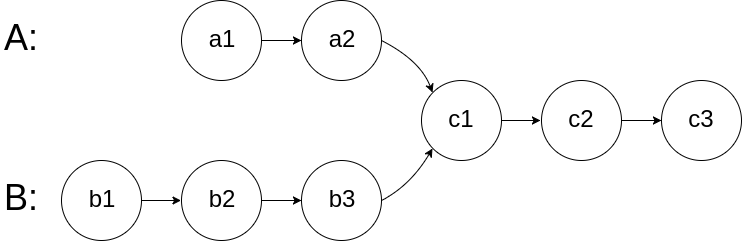

In [69]:
#understand the problem

#what do they mean by reference, not value? i.e. node.data is the same, and node.next is the same? SEE ABOVE IMAGE

#this means that a list intersects with another if at some point, node i to the tail node in linked list 1, match up with
#node j to the tail node in linked list 2
#it doesn't matter how many nodes come before hand, but all nodes from the intersect onwards must be equal
#equal in reference, as is the node itself is the same, not just node.data value, the node.next value matters as well


In [70]:
#Test cases:

#one of the linked lists is empty
#linked lists are not empty, but do not intersect (no nodes are the same)
#linked lists are not empty, and have some similar nodes, but not interecting (some node before the tail, or at tail changes)
#linked lists intersect (at the very end, at the tail)
#linked lists intersect (before the tail)

In [71]:
#Sketch a solution:

#solution A:

#check the size of the lists
#iterate through the bigger list
#for each node, see if it matches with a node in the smaller list
#if it does, go to the next node, and see if it matches with the next node in the other list

#this solution would take a lot of time
#first to calculate the lengths that would be O(N) time complexity, then traversing the lists doing our check would be O(N^2)

#is there an alternative way?

#we are basically checking if one linked list contains a subset of the other from j, to the end

#Solution B:
#start at the tail node of each list (could reverse them for simplicity)
#if the tails are not equal, they don't intersect (this is the minimum condition)
#if the tails intersect, iterate to the next item and repeat the check
#as soon as the check fails, return the previous node where the test did not fail

In [76]:
node1 = Node(4)
node2 = Node(4)

node1.next == node2.next

True

In [39]:
#solution B:

#start at the tail node of each list (could reverse them for simplicity)
#if the tails are not equal, they don't intersect (this is the minimum condition)
#if the tails intersect, iterate to the next item and repeat the check
#as soon as the check fails, return the previous node where the test did not fail

def intersect(list_1,list_2):
    
    if list_1.head is None or list_2.head is None:
        print('One or both of the lists is empty, cannot have an intersection')
    else:
        #reverse the lists (so that the tails are first) #note this takes O(N) time complexity
        list_1.reverse()
        list_2.reverse()

        if list_1.head.data != list_2.head.data:
            print("no intersection")
            #return False
        else:
            node_1 = list_1.head
            node_2 = list_2.head
            while node_1.data == node_2.data and node_1.next.data == node_2.next.data:
                node_1 = node_1.next
                node_2 = node_2.next

            
            #condition is broken, the next nodes are not the same
            print("intersecting node is {}".format(node_1.data))
            #return node_1

                
            
    


In [40]:
#Test cases:

#one of the linked lists is empty
#linked lists are not empty, but do not intersect (no nodes are the same)
#linked lists are not empty, but do not intersect (some nodes are the same)
#linked lists intersect (at the very end, at the tail)
#linked lists intersect (before the tail)

test_cases = [[[],[1,2,6]],
              [[1,2,5],[6,8,4]],
              [[1,2,5],[1,2,7]],
              [[1,2,5],[3,4,5]],
              [[1,2,5],[2,2,5]]]

In [36]:
for case in test_cases:
    list_1 = LinkedList(case[0])
    list_2 = LinkedList(case[1])
    
    print("the first list is: ")
    print(repr(list_1))
    print("the second list is: ")
    print(repr(list_2))
    
    intersect(list_1,list_2)
    print()    
    del list_1
    del list_2
    
    

the first list is: 
head
the second list is: 
head-->1-->2-->6
list is empty, cannot be reversed
the first list reversed is:
head
the second list reversed is:
head-->6-->2-->1
One or both of the lists is empty, cannot have an intersection

the first list is: 
head-->1-->2-->5
the second list is: 
head-->6-->8-->4
the first list reversed is:
head-->5-->2-->1
the second list reversed is:
head-->4-->8-->6
no intersection

the first list is: 
head-->1-->2-->5
the second list is: 
head-->1-->2-->7
the first list reversed is:
head-->5-->2-->1
the second list reversed is:
head-->7-->2-->1
no intersection

the first list is: 
head-->1-->2-->5
the second list is: 
head-->3-->4-->5
the first list reversed is:
head-->5-->2-->1
the second list reversed is:
head-->5-->4-->3
intersecting node is 5

the first list is: 
head-->1-->2-->5
the second list is: 
head-->2-->2-->5
the first list reversed is:
head-->5-->2-->1
the second list reversed is:
head-->5-->2-->2
2
2
intersecting node is 2



2.8 Loop Detection: Given a linked list which might contain a loop, implement an algorithm that returns the node at the beginning of the loop (if one exists)

EXAMPLE

Input: A -> B -> C -> D -> E -> C [the same C as earlier]

Output: C

In [ ]:
#understanding the problem

#there is no 'tail', in the sense that no node in the linked list contains a next == None
#to be the same C, in the example above, they have to be at the same memory location, not just the same value
    #for the sake of my example, I will say same value, and same next.value
    #in reality this would be checked by node1 == node2, rather than node1.data == node2.data and node1.next.data == ...

In [2]:
#Test Cases

#linked list is empty
#linked list has only one node
#linked list has two or more nodes, but does not have a loop (has a real tail)
#linked list has two or more nodes, and has a loop (at the very end, i.e. the last node connect to itself)
#linked list has two or more nodes, and has a loop, that is more than one node in length

In [3]:
#sketch solution

#solution A:

#check the minimum condition, that the tail does not have a .next of none
#If the tail does not have a .next of none, then return its .next value, because this is where the loop starts

#would take O(N) time complexity
#issue im seeing is how do we know we have reached the tail?
#we would have to track that we repeated a node

#one way might be to store nodes in a dictionary, then check if we have seen them before, 
#if yes, this is the node where the loop starts

#another way would be to simply iterate through the list, and stop if we reach a none, 
    #or if we reach a node that we have already seen before
    
#appears we will need a dictionary (hashmap in anycase)

In [7]:
def loop_detection(LL):
    
    if LL.head is None:
        print("the linked list is empty, cannot have a loop")
    else:
        nodes = {} #dictionary to track nodes we have encountered
        
        node = LL.head
        while node is not None:
            #check if we have encountered node before
            if (node.data, node.next.data) in nodes.items():
                return node
            else:
                nodes[node.data] = node.next.data
        
        #the reached a node that is none, there is a real tail, therefore no loop
        print("there is not a loop in the linked list")
                
    
    

In [8]:
#Test Cases

#linked list is empty
#linked list has only one node, and is not a loop
#linked list has only one node, and is a loop
#linked list has two or more nodes, but does not have a loop (has a real tail)
#linked list has two or more nodes, and has a loop (at the very end, i.e. the last node connect to itself)
#linked list has two or more nodes, and has a loop, that is more than one node in length

#implement a function to make a linked list a loop (turn the last nodes.next into a specific node earlier on)